In [20]:
import numpy as np
import pandas as pd

df = pd.read_csv('./input/FINAL_USO.csv')

In [21]:
df.isnull().sum()


Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [22]:
df.drop(['Date'],inplace=True,axis=1)


In [24]:
df.head()
X = df
y = X.pop('Adj Close')


In [30]:
from sklearn.tree import DecisionTreeRegressor

X_train,y_train = X[0:int(0.7*len(X))],y[0:int(0.7*len(y))]
# making predictions for following years
X_test,y_test = X[int(0.7*len(X)):len(X)],y[int(0.7*len(X)):len(X)]

In [31]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [39]:
xgbr.score(X_test,y_test)

0.9971077898932127

In [40]:
from sklearn.metrics import mean_squared_error
y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('The mean squared error is  ',mse)

The mean squared error is   0.06294563439589267


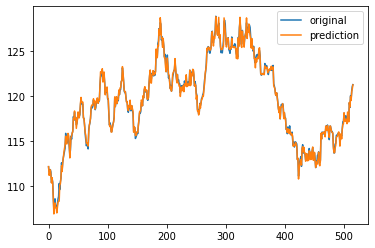

In [41]:
import matplotlib.pyplot as plt
x_test_label = range(len(y_test))
x_pred_label = range(len(y_pred))
plt.plot(x_test_label,y_test,label="original")
plt.plot(x_pred_label,y_pred,label="prediction")
plt.legend()
plt.show()